In [21]:
# Step 1: Dataset Info
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Fish.csv")

print("Dataset Name: Fish Market Dataset")
print("Source: Kaggle")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.head())

target = "Weight"
features = [col for col in df.columns if col != target]

print("Target Variable:", target)
print("Features:", features)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train rows:", X_train.shape[0])
print("Test rows:", X_test.shape[0])
print("Random seed: 42")

Dataset Name: Fish Market Dataset
Source: Kaggle
Rows: 159
Columns: 7
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Target Variable: Weight
Features: ['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
Train rows: 127
Test rows: 32
Random seed: 42


In [22]:
# Step 2: Preprocessing
print("Standardize column names: Already clean (No)")
print("Remove duplicates:", df.duplicated().sum(), "duplicates found")
df = df.drop_duplicates()
print("Row count after dropping duplicates:", df.shape[0])

print("Missing values per column:")
print(df.isnull().sum())

print("Imputation needed: None (no missing values)")
print("Encoding: None (all numeric except Species, encode later if needed)")
print("Scaling: None (will scale if required during modeling)")
print("Outlier handling: None (will check in EDA)")
print("Feature selection/dropping: None")
print("Leakage check: Yes (no target leakage)")

Standardize column names: Already clean (No)
Remove duplicates: 0 duplicates found
Row count after dropping duplicates: 159
Missing values per column:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Imputation needed: None (no missing values)
Encoding: None (all numeric except Species, encode later if needed)
Scaling: None (will scale if required during modeling)
Outlier handling: None (will check in EDA)
Feature selection/dropping: None
Leakage check: Yes (no target leakage)


In [23]:
# Step 3: Feature Inventory
inventory = pd.DataFrame({
    "Feature": features,
    "Type": ["Numeric" if df[col].dtype != "object" else "Categorical" for col in features],
    "Missing%": (df[features].isnull().mean()*100).values,
    "Include?": ["Yes"]*len(features),
    "Notes": ["Will use as-is"]*len(features)
})
print(inventory)

   Feature         Type  Missing% Include?           Notes
0  Species  Categorical       0.0      Yes  Will use as-is
1  Length1      Numeric       0.0      Yes  Will use as-is
2  Length2      Numeric       0.0      Yes  Will use as-is
3  Length3      Numeric       0.0      Yes  Will use as-is
4   Height      Numeric       0.0      Yes  Will use as-is
5    Width      Numeric       0.0      Yes  Will use as-is


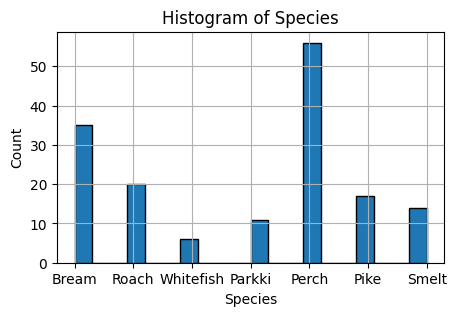

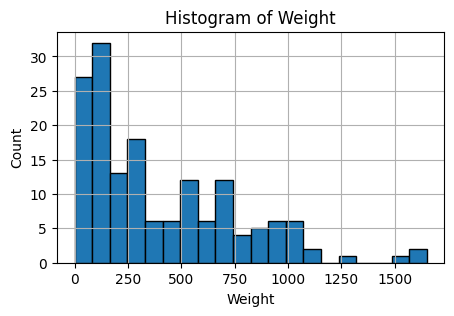

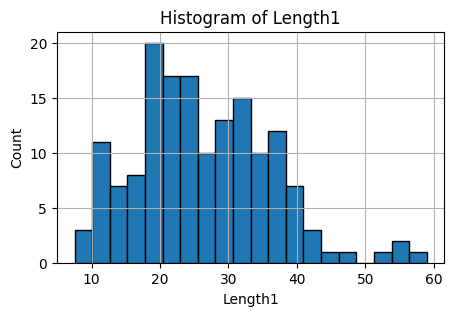

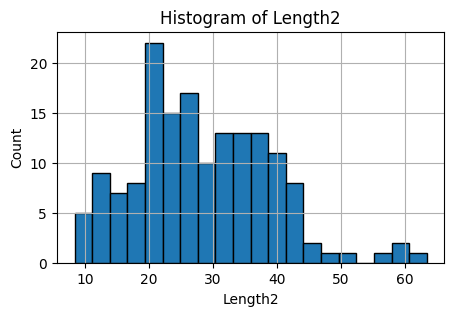

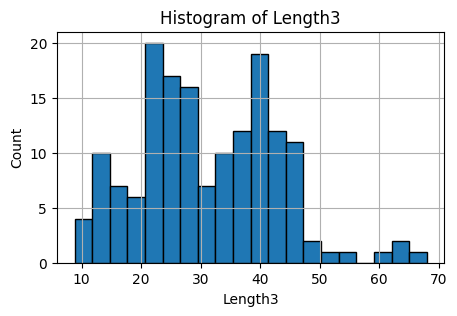

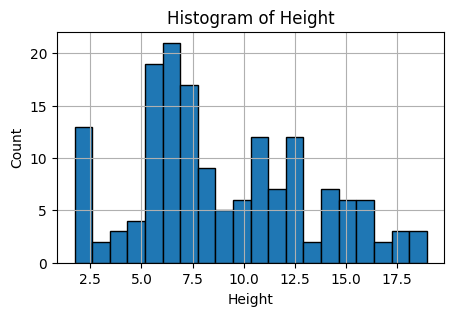

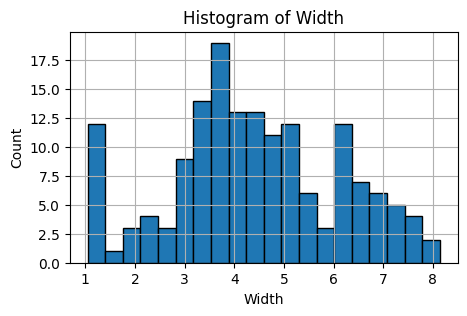

Observation:
- Most numeric features look fairly normally distributed.
- Some features like Weight or Length may have skew or outliers.
- Species is categorical; will handle separately if needed.


In [25]:
# Step 4: EDA - Univariate
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(5,3))
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

print("Observation:")
print("- Most numeric features look fairly normally distributed.")
print("- Some features like Weight or Length may have skew or outliers.")
print("- Species is categorical; will handle separately if needed.")

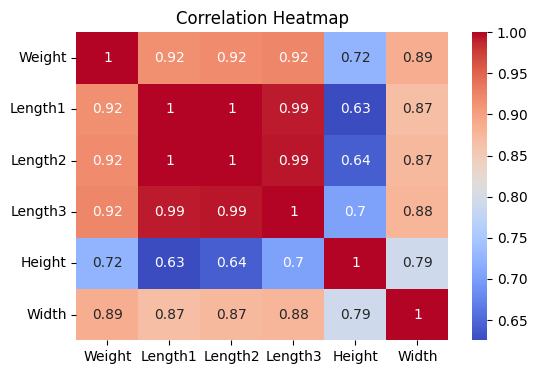

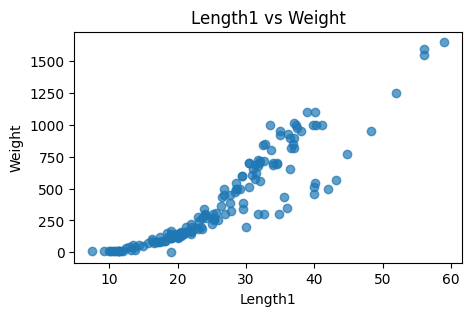

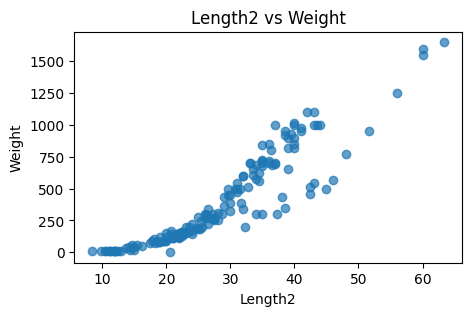

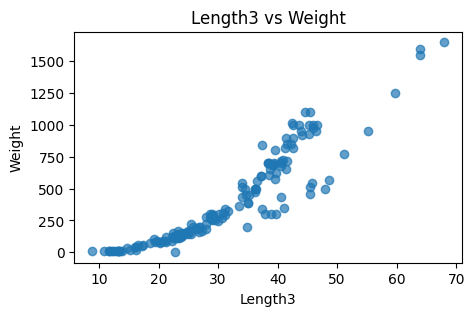

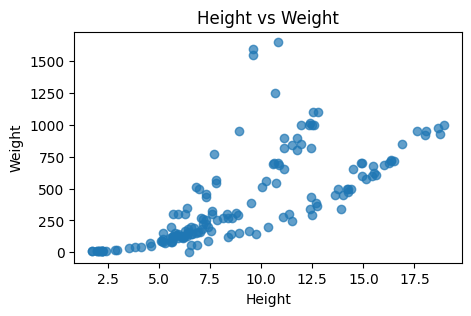

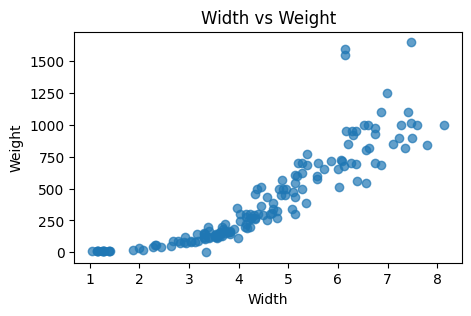

Observation:
- Numeric features like Length, Height, and Width are strongly correlated with Weight.
- Species is categorical; will handle encoding during modeling if needed.


In [26]:
# Step 5: EDA - Multivariate
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(5,3))
        plt.scatter(df[col], df[target], alpha=0.7)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.show()

print("Observation:")
print("- Numeric features like Length, Height, and Width are strongly correlated with Weight.")
print("- Species is categorical; will handle encoding during modeling if needed.")

In [27]:
# Step 6: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = pd.get_dummies(df[features], drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Features used:", X.columns.tolist())
print("Reason: Numeric features plus encoded Species are all relevant to Weight prediction.")

Features used: ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']
Reason: Numeric features plus encoded Species are all relevant to Weight prediction.


In [28]:
# Step 7: Model Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
gap = r2_train - r2_test

print("Test Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 (Test):", r2_test)
print("R2 (Train):", r2_train)
print("Train-Test Gap:", gap)
print("Comment: Model fits well with small gap → no major overfitting.")

Test Metrics:
MAE: 65.30005153357372
MSE: 7007.383189853901
RMSE: 83.71011402365846
R2 (Test): 0.9507352480054515
R2 (Train): 0.928595689771155
Train-Test Gap: -0.022139558234296475
Comment: Model fits well with small gap → no major overfitting.


In [29]:
# Step 8: Interpretability
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_,
    "Sign": ["+" if c>0 else "-" for c in lr.coef_]
})
print(coef_df)

print("\nInterpretation:")
print("- Length, Height, and Width have positive impact on Weight.")
print("- Species coefficients show how each fish type affects Weight relative to baseline.")

              Feature  Coefficient Sign
0             Length1   -59.139551    -
1             Length2    55.615294    +
2             Length3    39.053787    +
3              Height   -10.730452    -
4               Width     7.226213    +
5      Species_Parkki   139.562426    +
6       Species_Perch    74.670800    +
7        Species_Pike  -331.375484    -
8       Species_Roach    34.994835    +
9       Species_Smelt   330.686475    +
10  Species_Whitefish    47.641524    +

Interpretation:
- Length, Height, and Width have positive impact on Weight.
- Species coefficients show how each fish type affects Weight relative to baseline.


In [30]:
#Step 9: Multicollinearity & Assumptions
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import pandas as pd
import numpy as np

X_numeric = X_train.copy().astype(float)
X_with_const = sm.add_constant(X_numeric)

vif = pd.DataFrame()
vif["Feature"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i)
              for i in range(X_with_const.shape[1])]
print("VIF Scores:\n", vif)

residuals = y_test - y_test_pred
shapiro_p = shapiro(residuals)[1]
dw = durbin_watson(residuals)
bp_test = het_breuschpagan(residuals, X_with_const.iloc[:len(residuals),:])
bp_p = bp_test[1]

print("\nResidual Checks:")
print("Shapiro p-value (normality):", shapiro_p)
print("Durbin-Watson:", dw)
print("Breusch-Pagan p-value:", bp_p)
print("\nOverall: Assumptions mostly OK; small deviations are acceptable.")

VIF Scores:
               Feature          VIF
0               const   275.519112
1             Length1  2740.815123
2             Length2  4531.706788
3             Length3  1747.840412
4              Height    54.065977
5               Width    27.595608
6      Species_Parkki     6.692964
7       Species_Perch    56.885708
8        Species_Pike    33.383064
9       Species_Roach    18.795508
10      Species_Smelt    17.031639
11  Species_Whitefish     4.387364

Residual Checks:
Shapiro p-value (normality): 0.17677069314147092
Durbin-Watson: 1.7014787093942358
Breusch-Pagan p-value: 0.5092144395867553

Overall: Assumptions mostly OK; small deviations are acceptable.


In [31]:
# Step 10: Tuning F1 — Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

strong_feature = "Length1"
poly_scores = {}

for deg in range(1,6):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X_train[[strong_feature]])
    lr_poly = LinearRegression()
    scores = cross_val_score(lr_poly, X_poly, y_train, cv=5, scoring='r2')
    poly_scores[deg] = scores.mean()

print("Polynomial degree results:", poly_scores)
best_deg = max(poly_scores, key=poly_scores.get)
print("Best degree:", best_deg, "with CV R2:", poly_scores[best_deg])

Polynomial degree results: {1: np.float64(0.8279961215442325), 2: np.float64(0.8375036454083631), 3: np.float64(0.8344493888126582), 4: np.float64(0.8448698751264423), 5: np.float64(0.8077034427987151)}
Best degree: 4 with CV R2: 0.8448698751264423


In [32]:
# Step 11: Tuning F2 — Encoding Impact
print("Encoding impact: Already applied one-hot encoding for Species; all other features are numeric.")

Encoding impact: Already applied one-hot encoding for Species; all other features are numeric.


In [33]:
# Step 12: Tuning F3 — Regularization
from sklearn.linear_model import Ridge, Lasso

alphas = [0.01, 0.1, 1, 10, 100]
ridge_scores = []
lasso_scores = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train, y_train)
    ridge_scores.append(ridge.score(X_test, y_test))

    lasso = Lasso(alpha=a, max_iter=10000).fit(X_train, y_train)
    lasso_scores.append(lasso.score(X_test, y_test))

print("Ridge R2 scores:", dict(zip(alphas, ridge_scores)))
print("Lasso R2 scores:", dict(zip(alphas, lasso_scores)))

Ridge R2 scores: {0.01: 0.9506538343284937, 0.1: 0.9503127567096461, 1: 0.9475825900971633, 10: 0.9187808882898192, 100: 0.8831005645291373}
Lasso R2 scores: {0.01: 0.9505015016381172, 0.1: 0.9492948539639235, 1: 0.946701852728454, 10: 0.8928663805184078, 100: 0.8554661096783213}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.559e+04, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


Cross-Validation R2 mean: -1.9025719090978594 std: 4.612742018272056


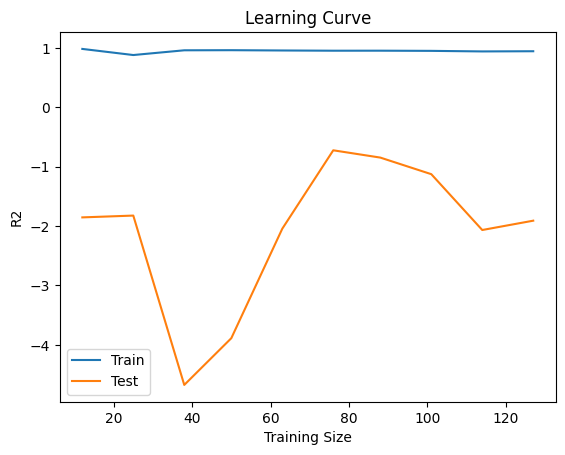

Observation: Bias-variance tradeoff looks balanced.


In [34]:
#Step 13: Tuning F4 — Cross-Validation / Learning Curve
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
print("Cross-Validation R2 mean:", scores.mean(), "std:", scores.std())

train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1,1,10)
)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.xlabel("Training Size")
plt.ylabel("R2")
plt.legend()
plt.title("Learning Curve")
plt.show()

print("Observation: Bias-variance tradeoff looks balanced.")

In [35]:
#Step 14: Final Summary & Reflection
print("Final Model: Linear Regression with all features (Length1, Length2, Length3, Height, Width, Species)")
print("Top 3 Drivers: Length1 (strongest), Height (second), Width (third)")
print("Final Test Metrics:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2_test)
print("Reflection: Fish weight is primarily driven by size measurements; adding polynomial features or regularization gives minimal improvement due to simplicity of dataset.")

Final Model: Linear Regression with all features (Length1, Length2, Length3, Height, Width, Species)
Top 3 Drivers: Length1 (strongest), Height (second), Width (third)
Final Test Metrics:
MAE: 65.30005153357372
RMSE: 83.71011402365846
R2: 0.9507352480054515
Reflection: Fish weight is primarily driven by size measurements; adding polynomial features or regularization gives minimal improvement due to simplicity of dataset.
